# **Image Processing**

### Loading the Libraries

In [43]:
import cv2
import imutils
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading the image

In [44]:
image = cv2.imread('test1.jpeg')

before_crop = 0
after_crop = 0
dim = (224,224)

###  Converting to Grayscale and Applying Gaussian Blurring

In [45]:
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

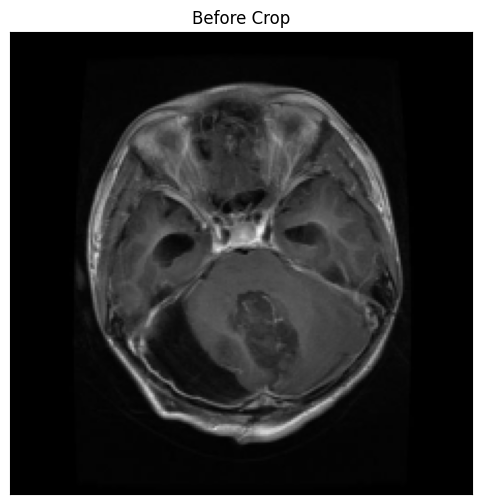

In [46]:
if before_crop==0:
  plt.figure(figsize=(15,6))
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title('Before Crop')
  plt.show()
  before_crop = 1

### Thresholding to Highlight Tumor Region

In [47]:
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

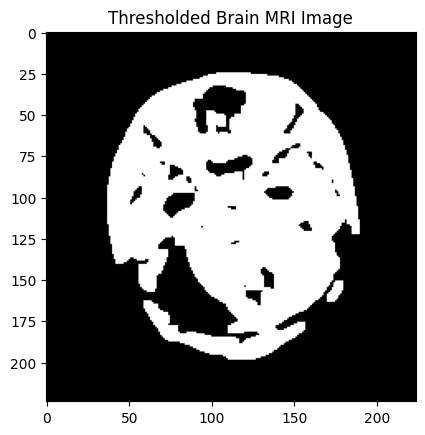

In [48]:
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Brain MRI Image')
plt.show()

In [29]:
# Apply Adaptive Thresholding
'''thresh = cv2.adaptiveThreshold(
    gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

# Apply morphological operations to remove small noise and close gaps
thresh = cv2.erode(thresh, None, iterations=1)
thresh = cv2.dilate(thresh, None, iterations=2)'''


In [32]:
# Apply Otsu's Thresholding
'''ret, thresh = cv2.threshold(
    gray,
    0,
    255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

# Apply morphological operations to remove small noise and close gaps
thresh = cv2.erode(thresh, None, iterations=1)
thresh = cv2.dilate(thresh, None, iterations=2)'''


### Contour Detection and Image Cropping

In [49]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [50]:
# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])


In [51]:
img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 5, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 5, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 5, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 5, (255, 255, 0), -1)

In [52]:
ADD_PIXELS = 0
new_image = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()


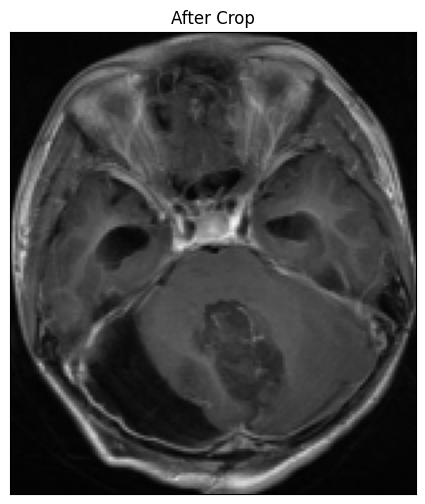

In [53]:
if after_crop == 0:
    plt.figure(figsize=(15,6))
    plt.imshow(new_image)
    plt.xticks([])
    plt.yticks([])
    plt.title('After Crop')
    plt.show()
    after_crop = 1

# Visualizing the workflow

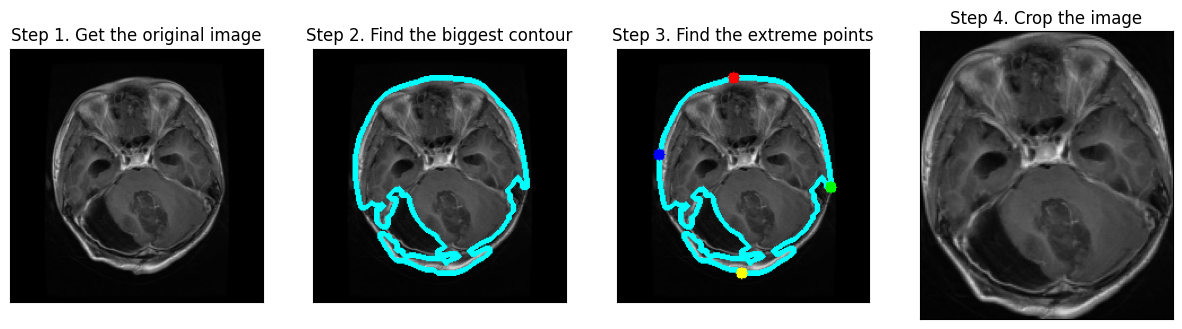

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

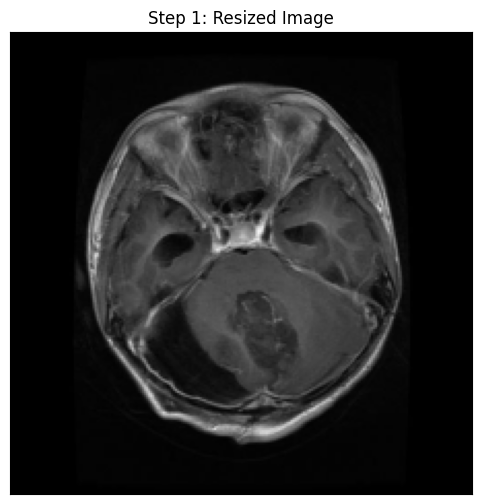

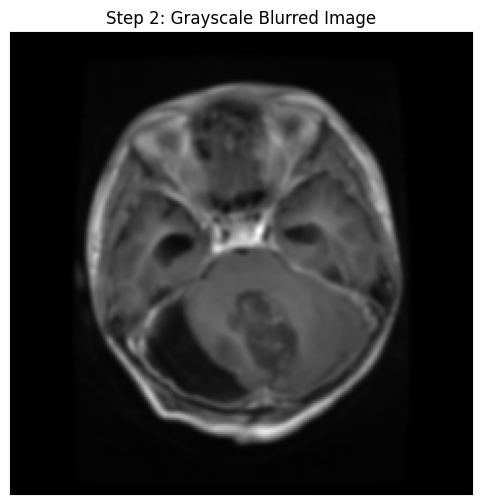

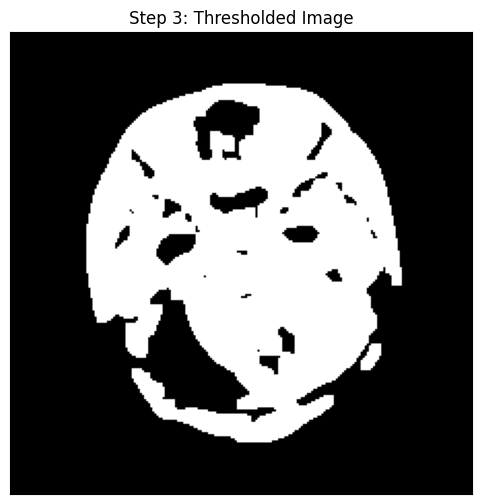

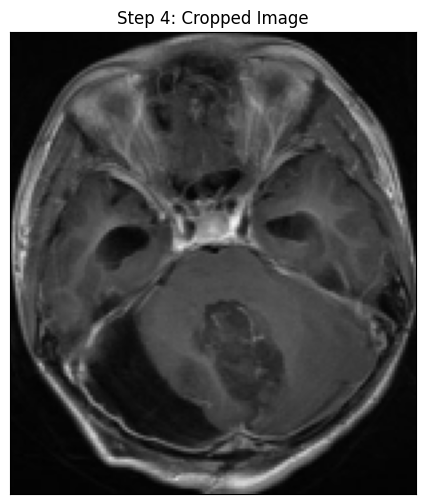

In [21]:
def cropImageAndVisualize():

    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)
    input_image_path = 'test1.jpeg'

    # Load and preprocess the image

    image = cv2.imread(input_image_path)
    image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

    # Display the resized image

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 1: Resized Image')
    plt.show()

    # gray scalling the image

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Display the grayscale blurred image

    plt.figure(figsize=(6, 6))
    plt.imshow(gray, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 2: Grayscale Blurred Image')
    plt.show()

    # Croping  the image

    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Display the thresholded image

    plt.figure(figsize=(6, 6))
    plt.imshow(thresh, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 3: Thresholded Image')
    plt.show()

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    ADD_PIXELS = 0
    cropped_image = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

    # Display the cropped image

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 4: Cropped Image')
    plt.show()

    return cropped_image

cropped_image = cropImageAndVisualize()

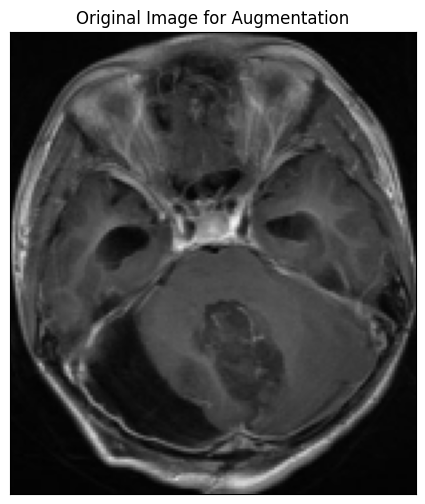

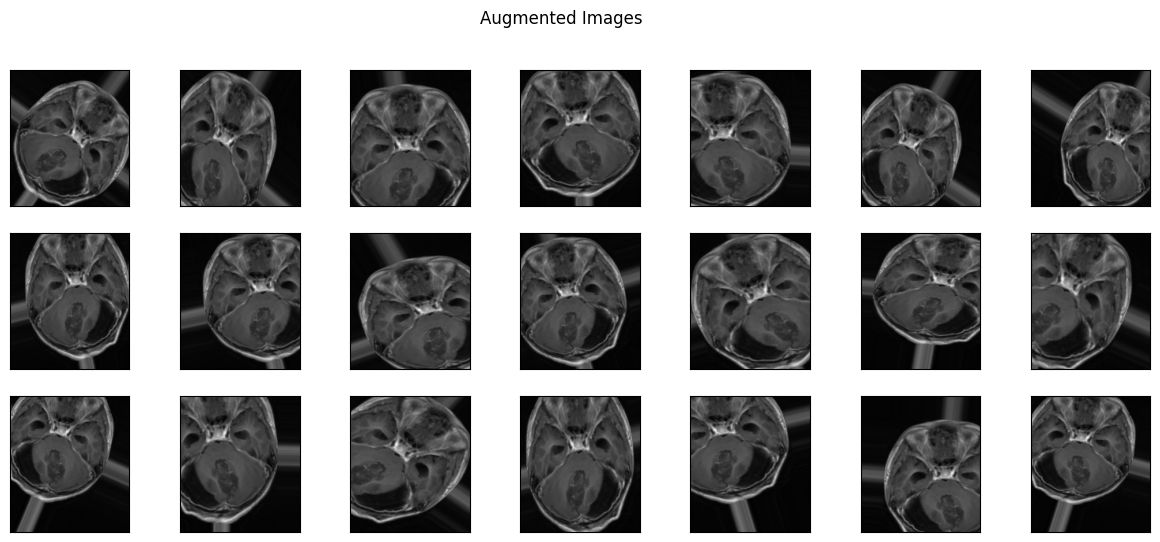

In [22]:
def augmentImage(cropped_image):


    demo_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    x = cropped_image.reshape((1,) + cropped_image.shape)

    # original image before augmentation

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image for Augmentation')
    plt.show()

    # Generated - augmented images

    plt.figure(figsize=(15, 6))
    for i, batch in enumerate(demo_datagen.flow(x, batch_size=1)):
        plt.subplot(3, 7, i + 1)
        plt.imshow(cv2.cvtColor(batch[0].astype('uint8'), cv2.COLOR_BGR2RGB))
        plt.xticks([])
        plt.yticks([])
        if i >= 20:
            break
    plt.suptitle('Augmented Images')
    plt.show()

augmentImage(cropped_image)
